<a href="https://colab.research.google.com/github/Cryslender/OIBSIP/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
%matplotlib inline

# Data Loading

In [ ]:
#load the dataset
new_york_city = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
# display 10 rows of the dataset
new_york_city.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Data Integrity

In [ ]:
# delete the id column and use host_id as index
new_york_city.drop(columns=['id'], inplace=True)
new_york_city.set_index('host_id', inplace=True)

In [ ]:
# checking the shape of the dataset
new_york_city.shape

(48895, 14)

In [ ]:
# checking statistics about the dataset
new_york_city.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# display the column names
new_york_city.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
# checking the infomation about the data
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2787 to 68119814
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_c

In [ ]:
# Clean the text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    clean_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    clean_text = [lemmatizer.lemmatize(word) for word in clean_tokens]
    # Join tokens back into a single string
    return ' '.join(clean_text)

In [ ]:
new_york_city['name'] = new_york_city['name'].astype(str)
new_york_city['name'] = new_york_city['name'].apply(clean_text)

In [ ]:
# change the price column dataype to float
new_york_city["price"] = new_york_city["price"].astype(float).round(2)

In [ ]:
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2787 to 68119814
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  float64
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_c

# Missing Data Handling

In [ ]:
#check the null values
print("Total Null Values")
new_york_city.isnull().sum()

Total Null Values


name                                  0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Replace null names and host names with "Unknown"
new_york_city['host_name'].fillna('Unknown', inplace=True)

# Replace null last_review with a date indicating no reviews
# For simplicity, let's assume it's 1900-01-01
new_york_city['last_review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Replace null values in reviews_per_month with 0 indicating no reviews were recorded
new_york_city['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
new_york_city.head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
2787,clean quiet apt home park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
2845,skylit midtown castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
4632,village harlem new york,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1900-01-01 00:00:00,0.00,1,365
4869,cozy entire floor brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
7192,entire apt spacious central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
7322,large cozy br apartment midtown east,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
7356,blissartsspace,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
8967,large furnished room near,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
7490,cozy clean guest room family apt,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0


In [ ]:
#check the null values
print("Total Null Values")
new_york_city.isnull().sum()

Total Null Values


name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Duplicate Removal

In [ ]:
#checking duplicates
new_york_city.duplicated().sum()

0

In [ ]:
# change last review data type to datetime
new_york_city['last_review'] = pd.to_datetime(new_york_city['last_review'])

In [ ]:
new_york_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2787 to 68119814
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   host_name                       48895 non-null  object        
 2   neighbourhood_group             48895 non-null  object        
 3   neighbourhood                   48895 non-null  object        
 4   latitude                        48895 non-null  float64       
 5   longitude                       48895 non-null  float64       
 6   room_type                       48895 non-null  object        
 7   price                           48895 non-null  float64       
 8   minimum_nights                  48895 non-null  int64         
 9   number_of_reviews               48895 non-null  int64         
 10  last_review                     48895 non-null  datetime64[ns]
 

In [ ]:
new_york_city.head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
2787,clean quiet apt home park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
2845,skylit midtown castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
4632,village harlem new york,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1900-01-01,0.00,1,365
4869,cozy entire floor brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
7192,entire apt spacious central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
7322,large cozy br apartment midtown east,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
7356,blissartsspace,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
8967,large furnished room near,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
7490,cozy clean guest room family apt,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0


# Standardization

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert neighbourhood_group column to label encoded values
new_york_city['neighbourhood_group'] = label_encoder.fit_transform(new_york_city['neighbourhood_group'])

# Convert room_type column to label encoded values
new_york_city['room_type'] = label_encoder.fit_transform(new_york_city['room_type'])

In [ ]:
new_york_city.head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
2787,clean quiet apt home park,John,1,Kensington,40.64749,-73.97237,1,149.0,1,9,2018-10-19,0.21,6,365
2845,skylit midtown castle,Jennifer,2,Midtown,40.75362,-73.98377,0,225.0,1,45,2019-05-21,0.38,2,355
4632,village harlem new york,Elisabeth,2,Harlem,40.80902,-73.94190,1,150.0,3,0,1900-01-01,0.00,1,365
4869,cozy entire floor brownstone,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89.0,1,270,2019-07-05,4.64,1,194
7192,entire apt spacious central park,Laura,2,East Harlem,40.79851,-73.94399,0,80.0,10,9,2018-11-19,0.10,1,0
7322,large cozy br apartment midtown east,Chris,2,Murray Hill,40.74767,-73.97500,0,200.0,3,74,2019-06-22,0.59,1,129
7356,blissartsspace,Garon,1,Bedford-Stuyvesant,40.68688,-73.95596,1,60.0,45,49,2017-10-05,0.40,1,0
8967,large furnished room near,Shunichi,2,Hell's Kitchen,40.76489,-73.98493,1,79.0,2,430,2019-06-24,3.47,1,220
7490,cozy clean guest room family apt,MaryEllen,2,Upper West Side,40.80178,-73.96723,1,79.0,2,118,2017-07-21,0.99,1,0


# Outlier Detection

In [ ]:
from scipy.stats import skew

# Selecting only numerical columns for outlier detection
numerical_columns = new_york_city.select_dtypes(include=[np.number])

# Calculate skewness for each numerical column
skewness = numerical_columns.apply(skew)

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
neighbourhood_group                0.373452
latitude                           0.237159
longitude                          1.284171
room_type                          0.422691
price                             19.118352
minimum_nights                    21.826605
number_of_reviews                  3.690521
reviews_per_month                  3.300622
calculated_host_listings_count     7.932931
availability_365                   0.763384
dtype: float64


In [ ]:
#detect oulier

def detect_outliers_iqr(data):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
    data (DataFrame): Input DataFrame containing numerical columns.

    Returns:
    outliers (DataFrame): DataFrame indicating the presence of outliers in each numerical column.
    outlier_rows (DataFrame): DataFrame containing rows with outliers.
    """
    # Select numerical columns for outlier detection
    numeric_columns = data.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)

    # Calculate the interquartile range (IQR) for each numerical column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each numerical column
    outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

    # Display the count of outliers for each numerical column
    print("Count of outliers for each numerical column:")
    print(outliers.sum())

    # Display the rows with outliers
    outlier_rows = data[outliers.any(axis=1)]
    print("Rows with outliers:")
    print(outlier_rows)

    return outliers, outlier_rows

In [ ]:
# Detect outliers using the function
outliers, outlier_rows = detect_outliers_iqr(new_york_city)

Count of outliers for each numerical column:
neighbourhood_group                373
latitude                           425
longitude                         2833
room_type                            0
price                             2972
minimum_nights                    6607
number_of_reviews                 6021
reviews_per_month                 3312
calculated_host_listings_count    7081
availability_365                     0
dtype: int64
Rows with outliers:
                                           name    host_name  \
host_id                                                        
2787                  clean quiet apt home park         John   
4869               cozy entire floor brownstone  LisaRoxanne   
7322       large cozy br apartment midtown east        Chris   
7356                             blissartsspace        Garon   
8967                  large furnished room near     Shunichi   
...                                         ...          ...   
41326856            

In [ ]:
# Define the columns with a significant number of outliers
columns_with_outliers = ['price', 'minimum_nights', 'number_of_reviews','longitude',
                         'reviews_per_month', 'calculated_host_listings_count', 'host_id']

# Winsorization function to handle outliers
def winsorize_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

# Transformation function (log transformation) to handle outliers
def log_transform(column):
    return np.log1p(column)

# Reset index to default integer index
new_york_city = new_york_city.reset_index()

# Apply outlier handling techniques for each column
for column in columns_with_outliers:
    if column in ['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews','reviews_per_month','longitude']:
        # Apply Winsorization for columns with a large number of outliers
        new_york_city[column] = winsorize_outliers(new_york_city[column])
    elif column in ['host_id', 'latitude']:
        # Apply log transformation for columns with a large number of outliers
        new_york_city[column] = log_transform(new_york_city[column])

# Print the modified dataset after outlier handling
print(new_york_city)

         host_id                                           name  \
0       7.933080                      clean quiet apt home park   
1       7.953670                          skylit midtown castle   
2       8.440960                        village harlem new york   
3       8.490849                   cozy entire floor brownstone   
4       8.880864               entire apt spacious central park   
...          ...                                            ...   
48890  15.923593  charming one bedroom newly renovated rowhouse   
48891  15.698120                   affordable room williamsburg   
48892  16.972211           sunny studio historical neighborhood   
48893  17.249038                                time single bed   
48894  18.036779               trendy duplex heart hell kitchen   

           host_name  neighbourhood_group       neighbourhood  latitude  \
0               John                    1          Kensington  40.64749   
1           Jennifer                    2    

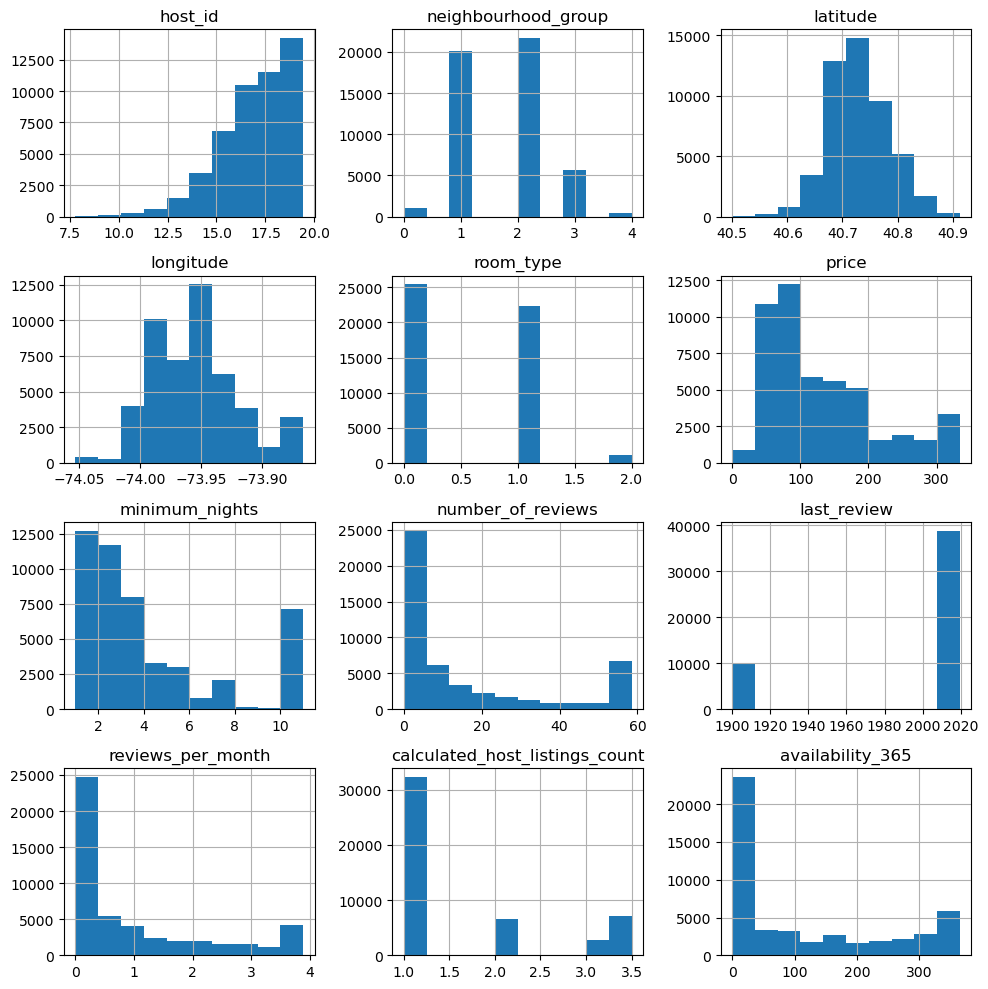

In [ ]:
# Visualize the modified dataset
new_york_city.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()